In [104]:
# import required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# for scaling
from sklearn.preprocessing import minmax_scale

In [87]:
# set seed for reproducibility
np.random.seed(0) 

In [88]:
# read in the csv dataset
df = pd.read_csv('beyonce_tracks.csv')

In [89]:
# check that the file has been read in, by looking at the 1st few rows

df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


In [90]:
# check hte shape of the dataset
df.shape

(336, 20)

In [91]:
# check the datatypes we are dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       336 non-null    object 
 1   track_name        336 non-null    object 
 2   album_name        336 non-null    object 
 3   is_explicit       336 non-null    bool   
 4   genres            336 non-null    object 
 5   release_date      336 non-null    object 
 6   track_id          336 non-null    object 
 7   danceability      336 non-null    float64
 8   valence           336 non-null    float64
 9   energy            336 non-null    float64
 10  loudness          336 non-null    float64
 11  acousticness      336 non-null    float64
 12  instrumentalness  336 non-null    float64
 13  liveness          336 non-null    float64
 14  speechiness       336 non-null    float64
 15  key               336 non-null    int64  
 16  tempo             336 non-null    float64
 1

In [92]:
# check the data stats
df.describe()

,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.612640,0.490362,0.682492,-7.289720,0.138767,0.079687,0.305424,0.168143,5.181548,121.615961,0.651786,250289.229167,3.922619
std,0.155603,0.233648,0.189090,2.854806,0.219504,0.209146,0.265685,0.150844,3.568488,29.594229,0.477115,98478.940431,0.408814
min,0.143000,0.038800,0.045200,-27.432000,0.000066,0.000000,0.016200,0.027100,0.000000,66.930000,0.000000,16373.000000,1.000000
25%,0.508750,0.323000,0.557750,-8.451000,0.005295,0.000000,0.097200,0.053650,1.000000,97.076500,0.000000,200813.000000,4.000000
50%,0.635000,0.489500,0.715000,-6.750500,0.037200,0.000020,0.201000,0.106500,6.000000,123.015000,1.000000,228933.000000,4.000000
75%,0.725250,0.651000,0.821750,-5.446750,0.158000,0.005510,0.392750,0.254750,8.000000,136.039000,1.000000,278884.750000,4.000000
max,0.925000,0.971000,0.993000,-2.706000,0.994000,0.937000,0.983000,0.940000,11.000000,216.788000,1.000000,597520.000000,5.000000


In [55]:
# drop columns that seem irrelevant to our analysis
df.drop(['track_id'],  axis=1, inplace=True)


In [56]:
# check that relvant column was dropped
df.shape


(336, 19)

In [57]:
df.columns

Index(['artist_name', 'track_name', 'album_name', 'is_explicit', 'genres',
       'release_date', 'danceability', 'valence', 'energy', 'loudness',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key',
       'tempo', 'mode', 'duration_ms', 'time_signature'],
      dtype='object')

In [58]:
# Check if there or columns with missing data

df.isnull()

,artist_name,track_name,album_name,is_explicit,genres,release_date,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
332,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
333,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
334,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
# since i don't have clarity of whthere there's null values between index 4 - 331, lets use another method
# This method will give a breakdown of columns, and number of missing values in each column
df.isna().sum() 

artist_name         0
track_name          0
album_name          0
is_explicit         0
genres              0
release_date        0
danceability        0
valence             0
energy              0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
key                 0
tempo               0
mode                0
duration_ms         0
time_signature      0
dtype: int64

In [47]:
# identify/ locate any duplicate data within our dataset
df.loc[df.duplicated()] 

,artist_name,track_name,album_name,is_explicit,genres,release_date,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature


In [72]:
# remove trailing white spaces from our 19 colums
# could we use a function to do the same for all 19 columns?

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [73]:
df.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


In [115]:
# Let's check if we're the dates are formatted consistently in the release_date column
df.release_date.dtype

dtype('O')

In [116]:
# We see that the format of release dates is object instead of date formatt - so we will parse the date
# Create a new column for parsed dates
df['release_date_parsed'] = pd.to_datetime(df['release_date'], format="%Y-%m-%d")

In [117]:
# check that the date parsed column is in the expected format
df['release_date_parsed'].head()

0   2022-07-29
1   2022-07-29
2   2022-07-29
3   2022-07-29
4   2022-07-29
Name: release_date_parsed, dtype: datetime64[ns]

In [114]:
df.shape

(336, 21)

In [127]:
df['release_date_parsed'].sort_values().head()

335   2002-06-17
333   2002-06-17
332   2002-06-17
334   2002-06-17
331   2003-05-20
Name: release_date_parsed, dtype: datetime64[ns]

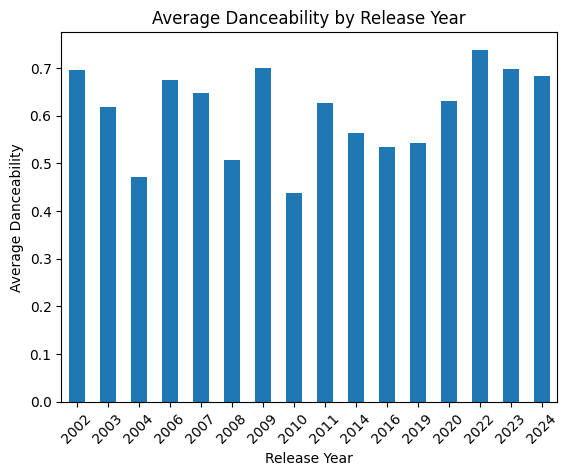

In [138]:
# Let's compare danceability vs average release years
# The release year can appear multiple times.
# This could be due to more than 1 album or song being release in that year.
# What we will do for better visualisation is to aggregate the danceability 

# Group by release year and calculate the mean danceability for each year
avg_danceability = df.groupby(df['release_date_parsed'].dt.year)['danceability'].mean()

# Plot the average danceability by release year
ax = avg_danceability.plot(kind='bar', title='Average Danceability by Release Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Average Danceability')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Note the following years: 2002, 2009, 2022, 2023, 2024

In [142]:
df['genres'].dtype

dtype('O')

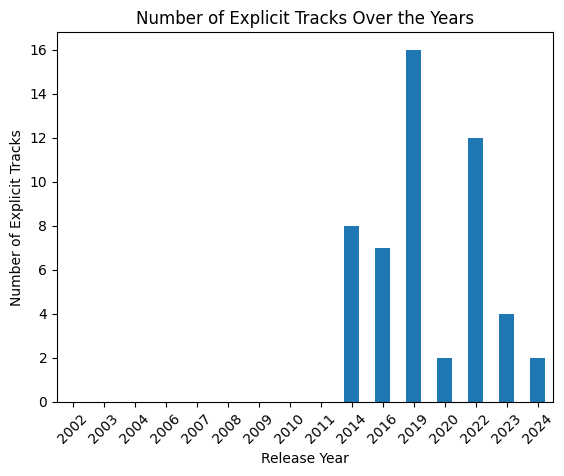

In [146]:
# Let's consider the most the explicity over the years

# Group by release year and count the occurrences of explicit tracks
explicit_counts = df.groupby(df['release_date_parsed'].dt.year)['is_explicit'].sum() # True =1 False = 0

# Group by release year and calculate the mean danceability for each year
avg_danceability = df.groupby(df['release_date_parsed'].dt.year)['danceability'].mean()

# Plot the count of explicit tracks by release year
ax = explicit_counts.plot(kind='bar', title='Number of Explicit Tracks Over the Years')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Explicit Tracks')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

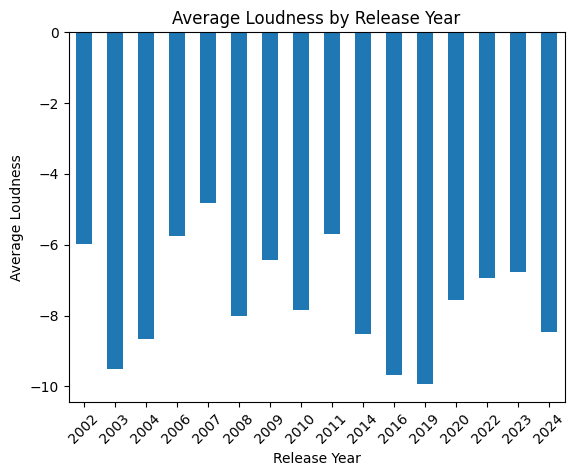

In [181]:
# Check loudness
# Group by release year and calculate the mean danceability for each year

avg_loudness = df.groupby(df['release_date_parsed'].dt.year)['loudness'].mean()

# Plot the average danceability by release year
ax = avg_loudness.plot(kind='bar', title='Average Loudness by Release Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Average Loudness')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()



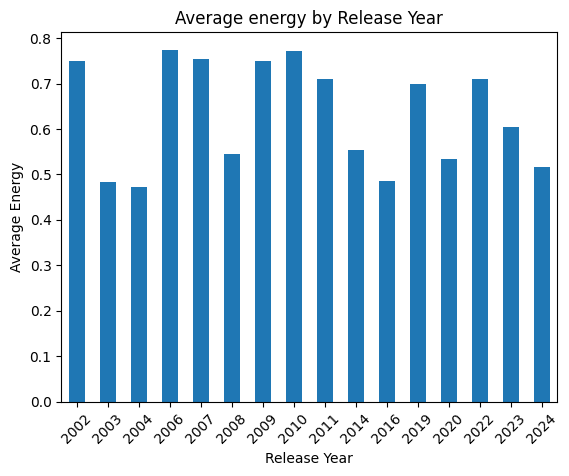

In [174]:
# Check energy
# Group by release year and calculate the mean energy for each year

avg_energy = df.groupby(df['release_date_parsed'].dt.year)['energy'].mean()

# Plot the average danceability by release year
ax = avg_energy.plot(kind='bar', title='Average energy by Release Year')
ax.set_xlabel('Release Year')
ax.set_ylabel('Average Energy')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

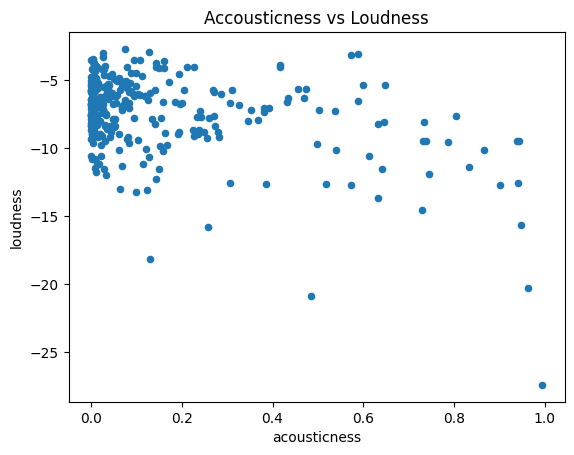

In [222]:
# Compare two features side by side on a scatter plot
df.plot(kind='scatter', x='acousticness', y='loudness', title='Accousticness vs Loudness')
plt.show()


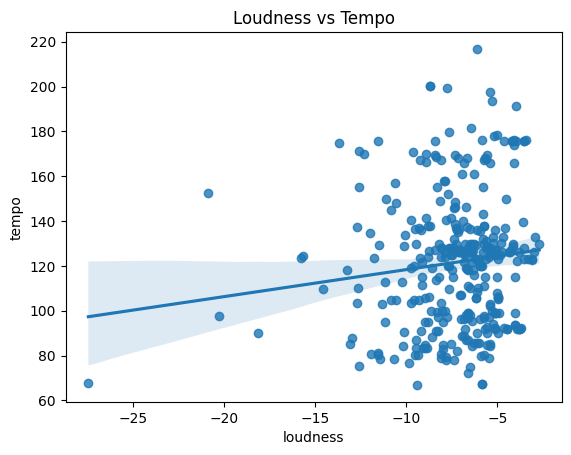

In [223]:
# Create a scatter plot with regression line comparing speechiness and tempo
sns.regplot(data=df, x='loudness', y='tempo')
plt.title('Loudness vs Tempo')
plt.show()



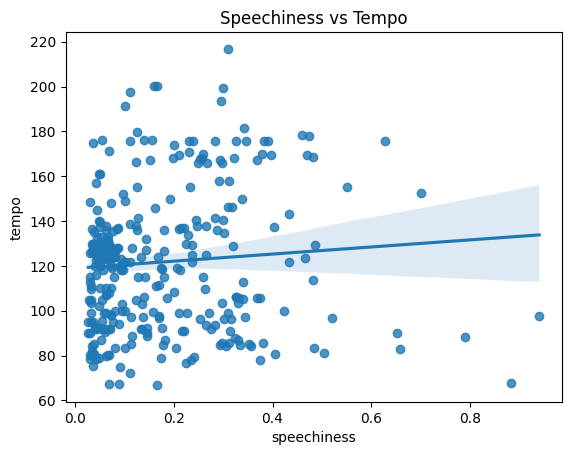

In [224]:
# Create a scatter plot with regression line comparing speechiness and tempo
sns.regplot(data=df, x='speechiness', y='tempo')
plt.title('Speechiness vs Tempo')
plt.show()

<Axes: >

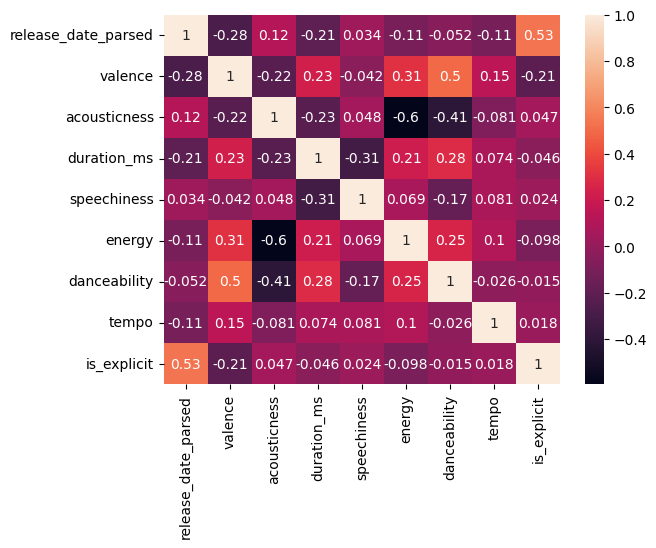

In [225]:
# Select columns for correlation
selected_columns = ['release_date_parsed', 'valence', 'acousticness', 'duration_ms', 'speechiness', 'energy', 'danceability', 'tempo', 'is_explicit']

# Calculate correlation matrix
df_corr = df[selected_columns].dropna().corr()

# Visualize correlation matrix using a heatmap
sns.heatmap(df_corr, annot=True)
